##**TITANIC SURVIVAL PREDICTION**

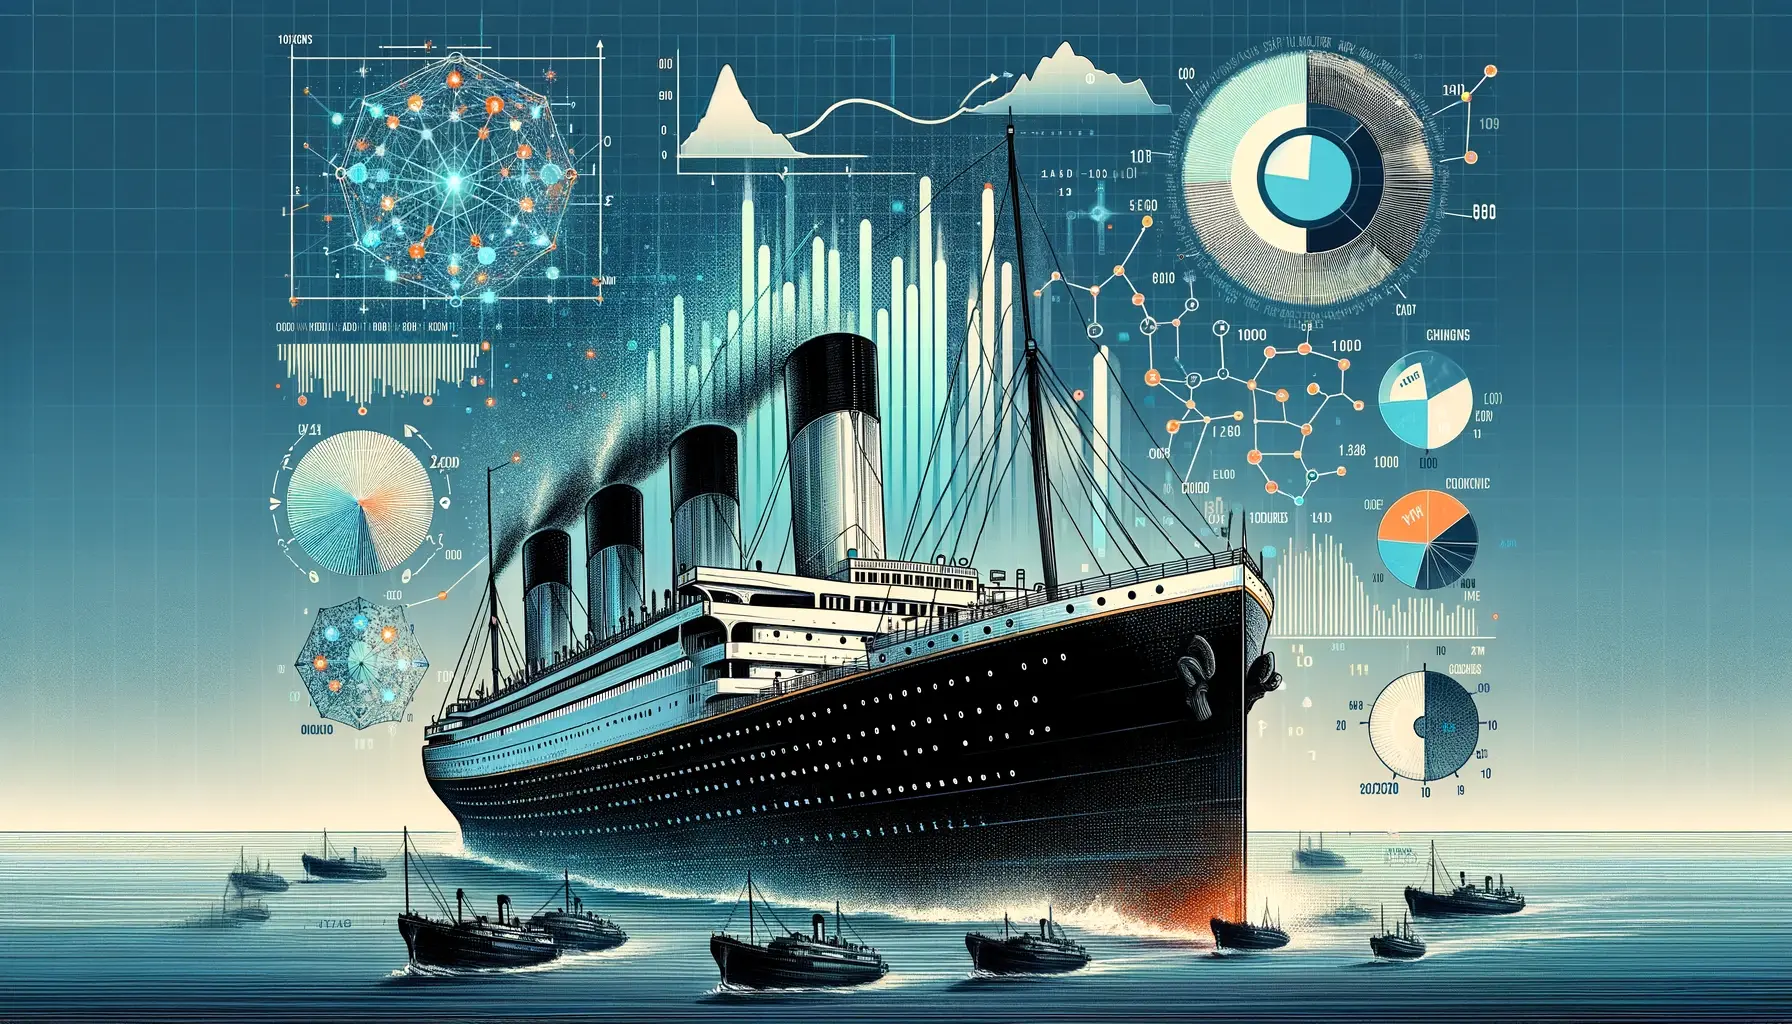


  




The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately,
there weren’t enough lifeboats for everyone on board,resulting in the death of 1502 out of 2224 passengers and crew.

Use the Titanic dataset to build a model that predicts whether a passenger on the Titanic survived or not. This is a classic beginner project with readily available data.
The dataset typically used for this project contains information about individual passengers, such as their age, gender, ticket class, fare, cabin, and whether or not they survived.

In [1]:
#Importing the required libraries
import pandas as pd
import numpy as np

In [3]:
#Reading the dataset
df = pd.read_csv("/content/Titanic-Dataset.csv")

##Data Preprocessing

To understand the data:
1. How big is the data?
2. How does the data look like?
3. What is the data-type of columns?
4. Are there any missing values?
5. How does the data look like mathematically?
6. Are there duplicate values?
7. How is the correlation between the columns?



In [4]:
#1. How big is the data?
print(f"The shape of the dataset is", df.shape)

The shape of the dataset is (891, 12)


In [5]:
#2. How does the data look like?
print("The random rows:") #To explore the data in appropriate way, we take random rows
df.sample(5)

The random rows:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
751,752,1,3,"Moor, Master. Meier",male,6.0,0,1,392096,12.4750,E121,S
281,282,0,3,"Olsson, Mr. Nils Johan Goransson",male,28.0,0,0,347464,7.8542,NaN,S
646,647,0,3,"Cor, Mr. Liudevit",male,19.0,0,0,349231,7.8958,NaN,S
359,360,1,3,"Mockler, Miss. Helen Mary ""Ellie""",female,NaN,0,0,330980,7.8792,NaN,Q
714,715,0,2,"Greenberg, Mr. Samuel",male,52.0,0,0,250647,13.0000,NaN,S


In [6]:
print("The first 5 rows:") #It will display the first 5 rows
df.head(5)

The first 5 rows:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
#3. What is the datatype of the columns?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
#4. Are there any missing values?
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
#5. How does the data look mathematically?
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
#6. Are there any duplicate values?
df.duplicated().sum()

0

In [11]:
#7. How is the correlation between the columns?
numeric_columns = df.select_dtypes(include=['int', 'float'])
# Calculate correlation
correlation_matrix = numeric_columns.corr()
# Display correlation matrix
print(correlation_matrix["Survived"]*100)

PassengerId     -0.500666
Survived       100.000000
Pclass         -33.848104
Age             -7.722109
SibSp           -3.532250
Parch            8.162941
Fare            25.730652
Name: Survived, dtype: float64


Start with exploratory data analysis (EDA) before addressing missing values. EDA helps you understand your data better, identify patterns, relationships, and potential outliers. This understanding can guide your decisions on how to handle missing values effectively.

During EDA, you might discover insights that inform your approach to handling missing data. For example, you might find that certain features have a high proportion of missing values or that missing values correlate with certain patterns in the data.

Once you have a good understanding of your data through EDA, you can then decide on the best strategies for dealing with missing values, such as imputation, deletion, or using advanced techniques like predictive modeling to fill in missing values.

##EXPLORATORY DATA ANALYSIS (EDA)

In [12]:
#Importing the visualization library
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Embarked'>

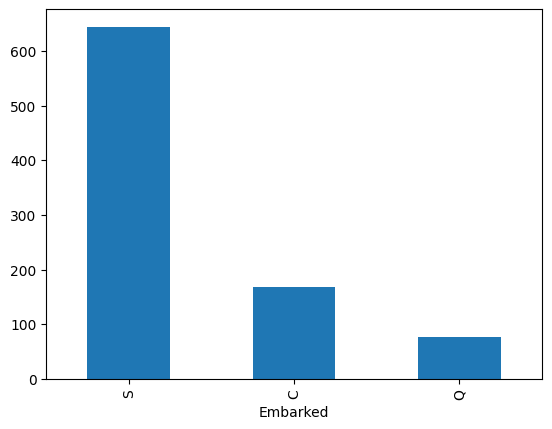

In [13]:
#let's perform Univariate analysis.
#There are three possible values for Embarked columns — Southampton, Cherbourg, and Queenstown which is denoted as S, C, Q
df["Embarked"].value_counts().plot(kind= "bar")

<Axes: ylabel='count'>

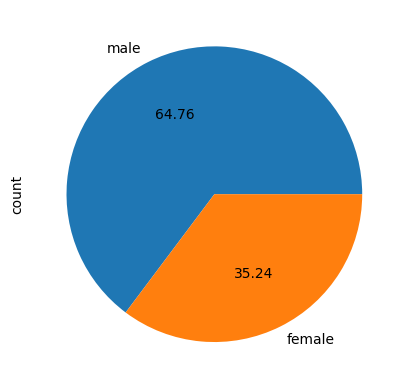

In [14]:
df["Sex"].value_counts().plot(kind="pie", autopct= "%.2f")

<Axes: xlabel='Survived', ylabel='Pclass'>

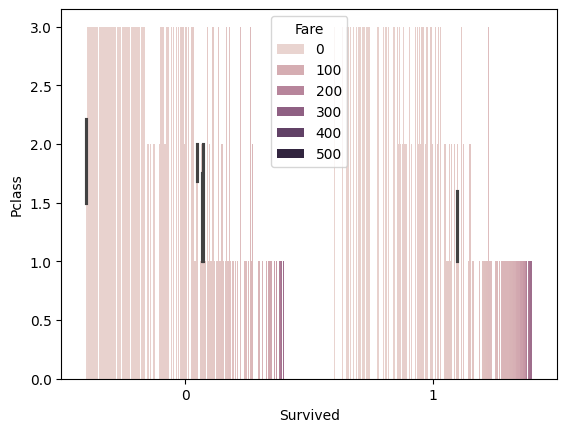

In [15]:
#Let's perform some multivariate analysis
sns.barplot(x ="Survived", y = "Pclass", hue= "Fare", data = df)

<Axes: xlabel='Sex', ylabel='Embarked'>

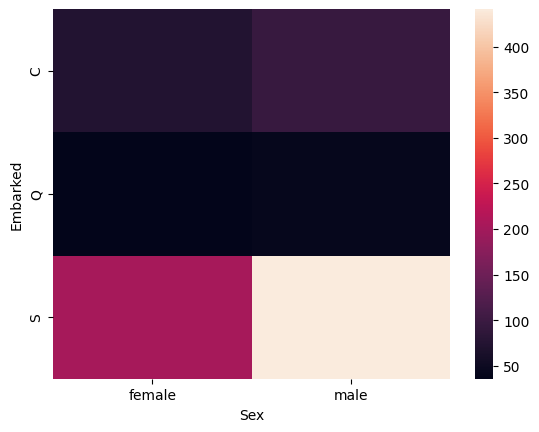

In [16]:
sns.heatmap(pd.crosstab(df["Embarked"], df["Sex"]))

<Axes: xlabel='Survived', ylabel='Embarked'>

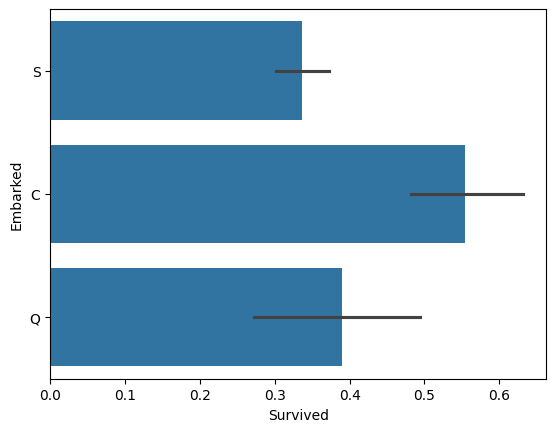

In [17]:
sns.barplot(x= "Survived", y= "Embarked", data = df)

<Axes: xlabel='Survived', ylabel='Sex'>

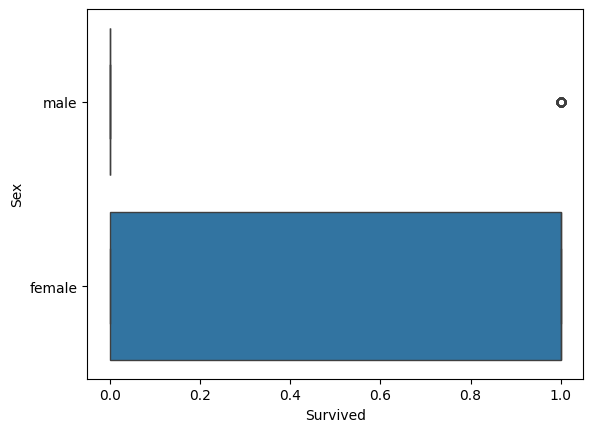

In [18]:
sns.boxplot(x= "Survived", y= "Sex", data = df)

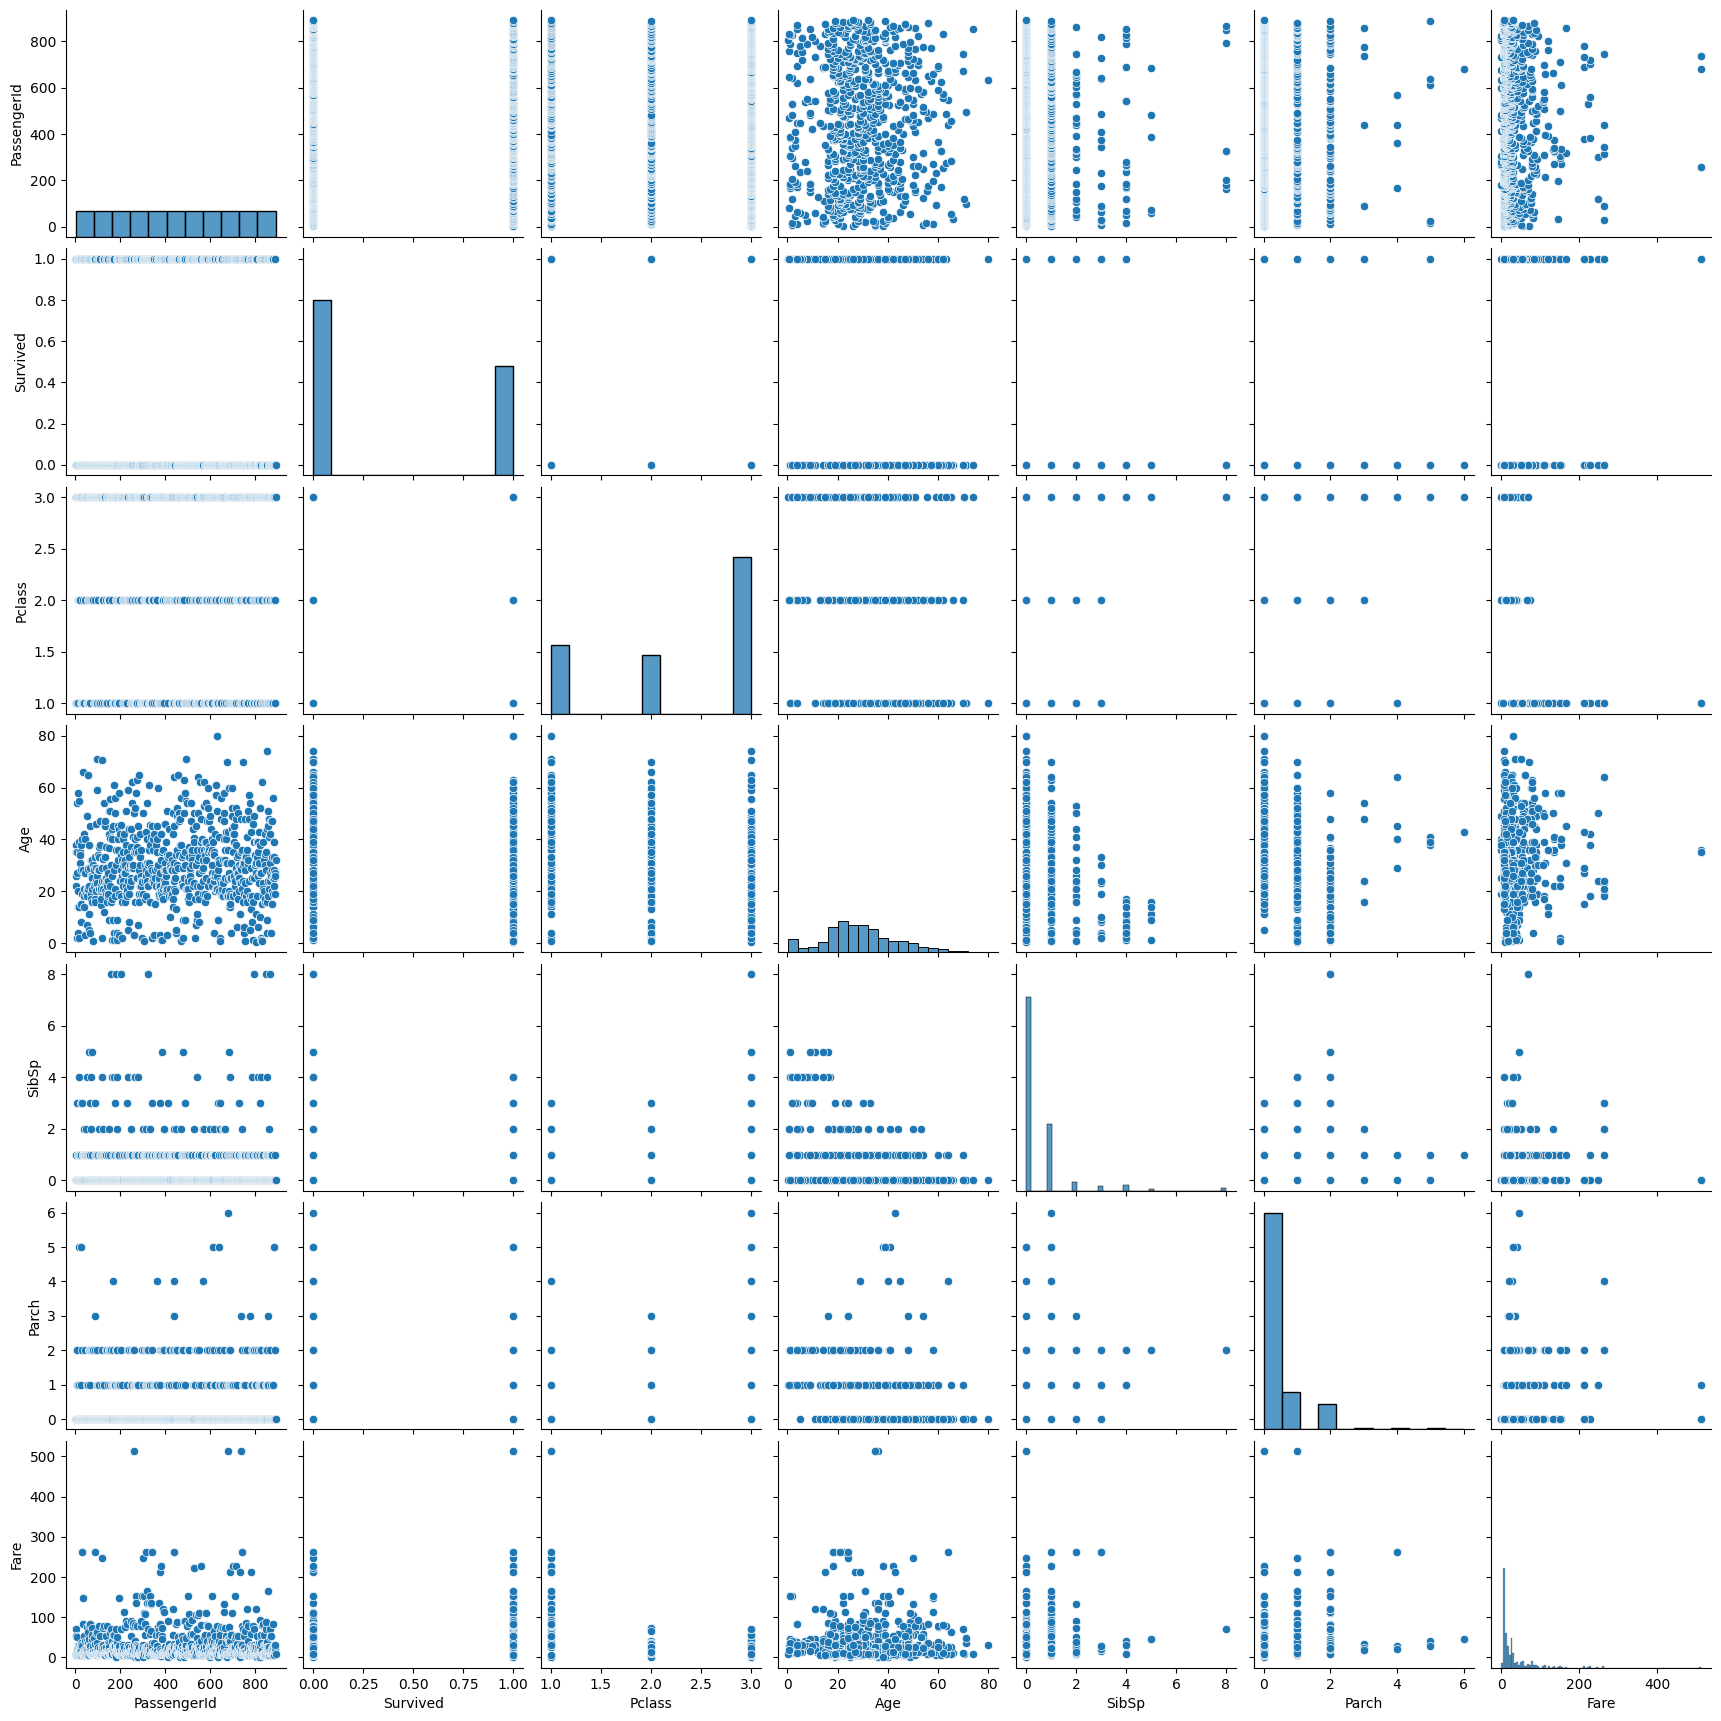

In [19]:
sns.pairplot(df)

##Feature Engineering

As we have checked before that we have few missing values in the columns Age: 177, Cabin: 687, Embarked: 2.

We will resolve this issue by using feature transformation technique called
#Missing Value Imputation

In [20]:
#Now settling up the Age column by replacing the missing value with mean of the column.
#as we are witnessed that age is slightly uniform distributed so we can use mean to replace the value
df["Age"]= df["Age"].fillna(df["Age"].mean())


In [21]:
#as embarked has only 2 missing value so we are going to use mode.
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode())

In [22]:
#now the last columns named as Cabin that has 687 missing value and it is not that useful for us so let's drop it.
df= df.drop(columns=["Cabin"])

In [23]:
#As we have Sex column as object data type and also one of the major column so encoding it.

from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
encoder = LabelEncoder()

# Perform label encoding
df["Sex"] = encoder.fit_transform(df["Sex"])

In [24]:
encoder1 = LabelEncoder()
df["Embarked"]  = encoder1.fit_transform(df["Embarked"])

##Model Preprocessing

In [25]:
from sklearn.model_selection import train_test_split
df= df.drop(columns= ["Name", "Ticket"])
X = df.drop(columns="Survived")
y= df["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.25)

In [26]:
print("The size of X_train is", X_train.shape)
print("The size of y_train is", y_train.shape)
print("The size of X_test is", X_test.shape)
print("The size of y_test is", y_test.shape)

The size of X_train is (668, 8)
The size of y_train is (668,)
The size of X_test is (223, 8)
The size of y_test is (223,)


In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Evaluate accuracy
#accuracy = accuracy_score(y_test, y_pred)
#print("Accuracy:", accuracy)


##Testing the Input data

In [42]:
new_input = pd.DataFrame({
    'PassengerId': [752],
    'Pclass': [3],       # Passenger class
    'Sex': [1],     # Sex
    'Age': [25],         # Age
    'SibSp': [1],        # Number of siblings/spouses aboard
    'Parch': [0],        # Number of parents/children aboard
    'Fare': [7.25],      # Passenger fare
    'Embarked': [2]    # Port of embarkation
})


predicted_survival = rf.predict(new_input)

# Print the predicted survival status
print("Predicted Survival:", predicted_survival)


Predicted Survival: [0]


In [44]:
def survived(predicted_survival):
  if predicted_survival == [0]:
    print("NOT SURVIVED")
  else:
    print("SURVIVED")

survived(predicted_survival)

NOT SURVIVED
